#Challenge: Preparing a Dataset for Modeling

Using a dataset of your choice, select an outcome variable and then pick four or five other variables (one to two categorical, three to four continuous) to act as the basis for features. Explore the variables using the univariate and bivariate methods you've learned so far.

Next, based on what you learned via your data exploration, create ten new features. Explain the reasoning behind each one.

Finally, use filtering methods to select the five best features and justify your choices.

In [0]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
nbadf = pd.read_csv("https://raw.githubusercontent.com/RRamirez21/ThinkfulDrills/master/NBA_player_of_the_week.csv")

This data set shows the "Player of the Week" in the National Basketball Association from 1984-1985 to 2017-2018, along with relevant data for that player.

In [0]:
nbadf.head(3)

,Age,Conference,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value
0,29,NaN,"Apr 14, 1985",1978,6-5,Micheal Ray Richardson,PG,1984-1985,1985,6,New Jersey Nets,189,1.0
1,23,NaN,"Apr 7, 1985",1982,6-6,Derek Smith,SG,1984-1985,1985,2,Los Angeles Clippers,205,1.0
2,28,NaN,"Apr 1, 1985",1979,6-6,Calvin Natt,F,1984-1985,1985,5,Denver Nuggets,220,1.0


In [0]:
nbadf.shape

(1145, 13)

In [0]:
nbadf.dropna()


,Age,Conference,Date,Draft Year,Height,Player,Position,Season,Season short,Seasons in league,Team,Weight,Real_value
384,24,East,"Apr 7, 2002",1998,6-7,Paul Pierce,SF,2001-2002,2002,3,Boston Celtics,235,0.5
385,25,West,"Apr 7, 2002",1997,6-11,Tim Duncan,FC,2001-2002,2002,4,San Antonio Spurs,250,0.5
386,27,East,"Mar 31, 2002",1996,6-9,Ben Wallace,FC,2001-2002,2002,5,Detroit Pistons,240,0.5
387,23,West,"Mar 31, 2002",1999,6-7,Shawn Marion,F,2001-2002,2002,2,Phoenix Suns,228,0.5
388,28,East,"Mar 24, 2002",1994,6-4,Jason Kidd,PG,2001-2002,2002,7,New Jersey Nets,210,0.5
389,25,West,"Mar 24, 2002",1997,6-11,Tim Duncan,FC,2001-2002,2002,4,San Antonio Spurs,250,0.5
390,22,East,"Mar 17, 2002",1997,6-8,Tracy McGrady,GF,2001-2002,2002,4,Orlando Magic,210,0.5
391,25,West,"Mar 17, 2002",1997,6-11,Tim Duncan,FC,2001-2002,2002,4,San Antonio Spurs,250,0.5
392,29,East,"Mar 10, 2002",1995,6-9,Kurt Thomas,FC,2001-2002,2002,6,New York Knicks,240,0.5
393,29,West,"Mar 10, 2002",1992,7-1,Shaquille O'Neal,C,2001-2002,2002,9,Los Angeles Lakers,325,0.5


In [0]:
player_count = nbadf.groupby('Player').size()

In [0]:
player_count.sort_values(ascending=False)[:10]

Player
LeBron James        61
Kobe Bryant         33
Kevin Durant        26
Michael Jordan      25
Karl Malone         23
Tim Duncan          23
Allen Iverson       23
Shaquille O'Neal    20
Kevin Garnett       20
Dwyane Wade         19
dtype: int64

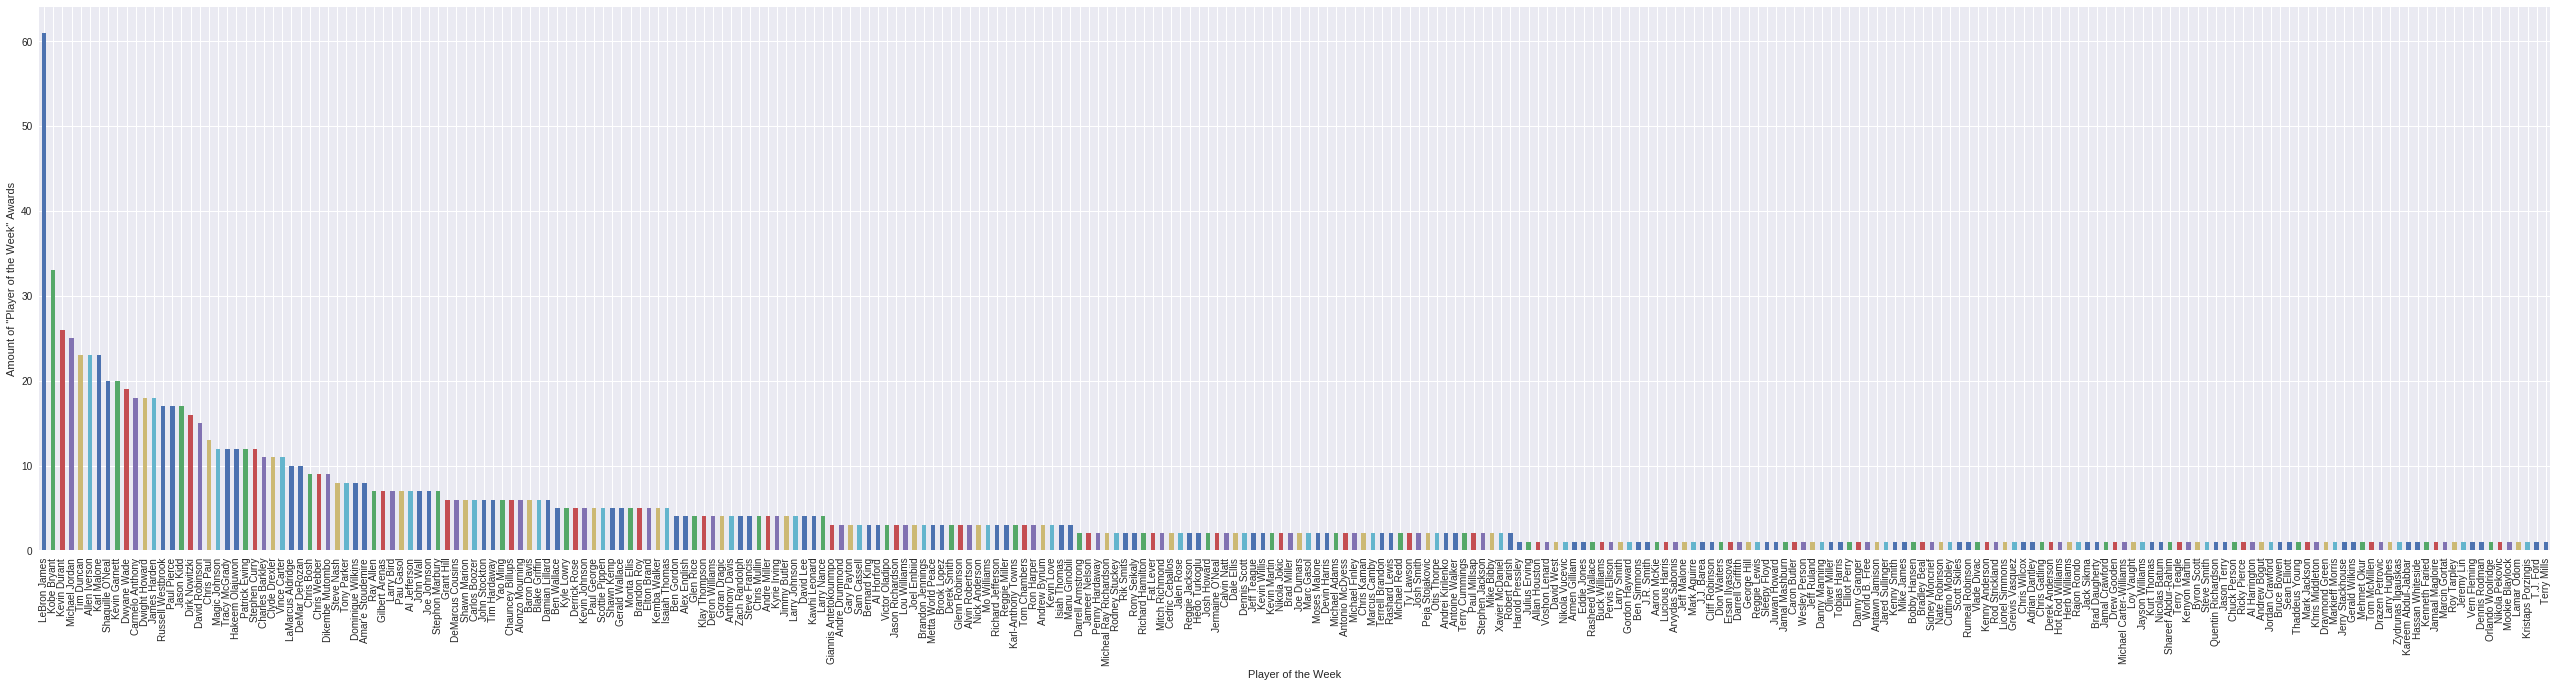

In [0]:
plt.figure(figsize=(45,10))
pd.value_counts(nbadf['Player']).plot.bar()
plt.xlabel('Player of the Week')
plt.ylabel('Amount of \"Player of the Week\" Awards')
plt.show()

In [0]:
nbadf.dtypes

Age                    int64
Conference            object
Date                  object
Draft Year             int64
Height                object
Player                object
Position              object
Season                object
Season short           int64
Seasons in league      int64
Team                  object
Weight                object
Real_value           float64
dtype: object

In [0]:
nbadf["Weight"].unique()

array(['189', '205', '220', '225', '190', '170', '232', '255', '200',
       '215', '185', '180', '230', '242', '252', '208', '210', '240',
       '265', '195', '163', '250', '175', '229', '228', '245', '260',
       '280', '325', '168', '247', '150', '279', '165', '212', '235',
       '194', '209', '193', '178', '254', '233', '218', '259', '310',
       '266', '223', '261', '184', '191', '188', '289', '199', '249',
       '198', '211', '222', '285', '196', '186', '307', '217', '251',
       '246', '270', '221', '268', '253', '231', '244', '100kg', '91kg',
       '105kg', '86kg', '120kg', '88kg', '95kg', '111kg', '83kg', '104kg',
       '113kg', '114kg', '84kg', '122kg', '102kg', '116kg', '101kg',
       '109kg', '115kg', '85kg', '118kg', '127kg', '106kg', '79kg',
       '94kg', '107kg'], dtype=object)

In [0]:
nbadf.filter

<bound method NDFrame.filter of       Age Conference          Date  Draft Year Height                  Player  \
0      29        NaN  Apr 14, 1985        1978    6-5  Micheal Ray Richardson   
1      23        NaN   Apr 7, 1985        1982    6-6             Derek Smith   
2      28        NaN   Apr 1, 1985        1979    6-6             Calvin Natt   
3      37        NaN  Mar 24, 1985        1969    7-2     Kareem Abdul-Jabbar   
4      28        NaN  Mar 17, 1985        1978    6-9              Larry Bird   
5      26        NaN  Mar 10, 1985        1980    6-4        Darrell Griffith   
6      24        NaN   Mar 3, 1985        1982    6-3            Sleepy Floyd   
7      25        NaN  Feb 24, 1985        1981    6-6            Mark Aguirre   
8      25        NaN  Feb 17, 1985        1979    6-9           Magic Johnson   
9      25        NaN   Feb 3, 1985        1982    6-7       Dominique Wilkins   
10     32        NaN  Jan 27, 1985        1974   6-11            Tom McMillen

In [0]:
for index, row in nbadf.iterrows():
    
  if "cm" in row['Height']:
    newValue = float(row['Height'].replace('cm', '')) * 0.393701
    nbadf.iloc[index, 4] = str(newValue)
    
  if '-' in row['Height']:
    # we split the string, the first value is multiplied by 12
    # and added to the second value 
    heightInFeet = row['Height'].split('-')
    newValue = float(heightInFeet[0]) * 12 + float(heightInFeet[1])
    nbadf.iloc[index, 4] = str(newValue)

    
    
#indicesToChange
nbadf['Height'] = nbadf['Height'].astype(np.float16)

In [0]:
nbadf["Height"].unique()

array([77.    , 78.    , 86.    , 81.    , 76.    , 75.    , 79.    ,
       83.    , 74.    , 73.    , 82.    , 84.    , 80.    , 70.    ,
       85.    , 72.    , 88.    , 87.    , 71.    , 90.    , 69.    ,
       81.125 , 75.1875, 79.125 , 77.1875, 83.875 , 72.8125, 79.9375,
       81.875 , 68.875 , 83.0625, 85.0625, 72.0625])

In [0]:
for index, row in nbadf.iterrows():
  
  if "kg" in row["Weight"]:
    newValue = float(row["Weight"].replace('kg', '')) * 2.2046
    nbadf.iloc[index, 11] = str(newValue)
                   
nbadf["Weight"] = nbadf["Weight"].astype(np.float16)

                     

In [0]:
nbadf["Weight"].unique()

array([189.   , 205.   , 220.   , 225.   , 190.   , 170.   , 232.   ,
       255.   , 200.   , 215.   , 185.   , 180.   , 230.   , 242.   ,
       252.   , 208.   , 210.   , 240.   , 265.   , 195.   , 163.   ,
       250.   , 175.   , 229.   , 228.   , 245.   , 260.   , 280.   ,
       325.   , 168.   , 247.   , 150.   , 279.   , 165.   , 212.   ,
       235.   , 194.   , 209.   , 193.   , 178.   , 254.   , 233.   ,
       218.   , 259.   , 310.   , 266.   , 223.   , 261.   , 184.   ,
       191.   , 188.   , 289.   , 199.   , 249.   , 198.   , 211.   ,
       222.   , 285.   , 196.   , 186.   , 307.   , 217.   , 251.   ,
       246.   , 270.   , 221.   , 268.   , 253.   , 231.   , 244.   ,
       220.5  , 200.625, 231.5  , 189.625, 264.5  , 209.375, 244.75 ,
       183.   , 229.25 , 249.125, 251.375, 185.125, 269.   , 224.875,
       255.75 , 222.625, 240.25 , 253.5  , 187.375, 260.25 , 233.75 ,
       174.125, 207.25 , 235.875])

In [0]:
nbadf["Date"] = pd.to_datetime(nbadf["Date"])

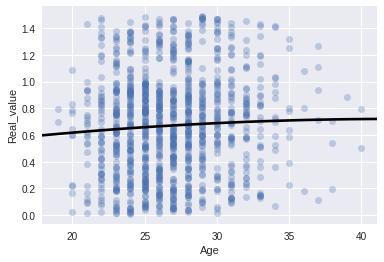

In [0]:
sns.regplot(
    nbadf['Age'],
    y=nbadf['Real_value'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()


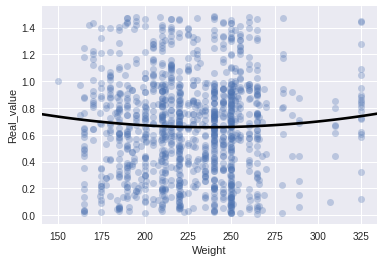

In [0]:
nbadf['Weight'] = nbadf['Weight'].astype('float64') 
sns.regplot(
    nbadf['Weight'],
    y=nbadf['Real_value'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

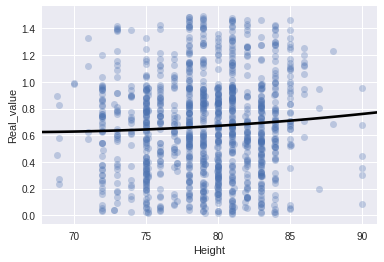

In [0]:
sns.regplot(
    nbadf['Height'],
    y=nbadf['Real_value'],
    y_jitter=.49,
    order=2,
    scatter_kws={'alpha':0.3},
    line_kws={'color':'black'},
    ci=None
)
plt.show()

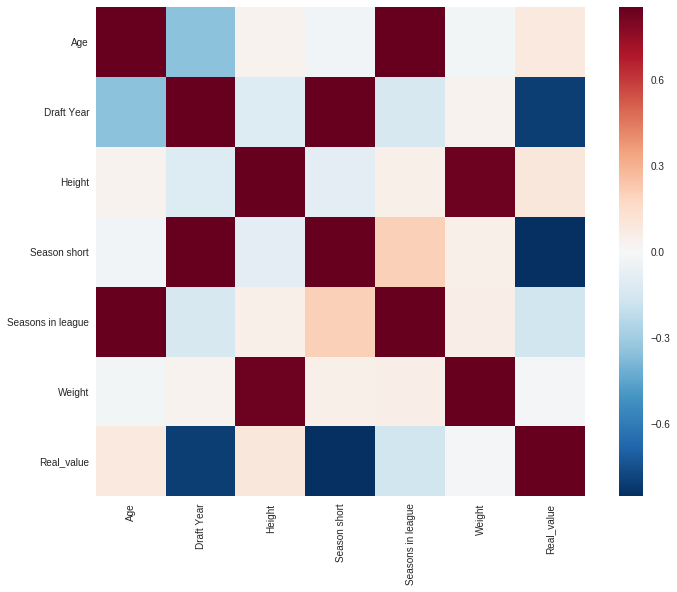

In [0]:
corrmat = nbadf.corr()

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()


In [0]:
features = {}

means = nbadf[['Age','Height','Weight']].mean(axis=0)
stds = nbadf[['Age','Height','Weight']].std(axis=0)
features['trust_fair_help'] = ((nbadf[['Age','Height','Weight']] - means) / stds).mean(axis=1)

plotdf = nbadf.loc[:, ['Age', 'Height', 'Weight']]
plotdf['trust_fair_help'] = features['trust_fair_help'] 
corrmat2 = plotdf.corr()

print(corrmat2)

                      Age    Height    Weight  trust_fair_help
Age              1.000000  0.030869 -0.022055         0.465441
Height           0.030869  1.000000  0.840095         0.863210
Weight          -0.022055  0.840095  1.000000         0.838794
trust_fair_help  0.465441  0.863210  0.838794         1.000000


The features above indicate physical characteristics of each athlete. However, more relevant features would be statistics. For example: Wins, Losses, Points, Points per game, Rebounds per game, Assists per game, Minutes, Blocks, Steals, and Turnovers are all likely to be related with winning the "Player of the Week" Award. Of these ten, the features that are likely to be the best are Wins, points per game, rebounds per game, assists per game, and steals. More wins presumably mean more exposure to voters of the award. Additionally, more of the remaining four features are the most likely to contribute to wins.